In [172]:
# world attlas data
# clean data for QIN

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') # filter some warning messages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [3]:
ldom = np.array([[46, 48],[-125.0, -123.8]])
ldom = np.array([[45.5, 48],[-125.5, -123.8]])
#qbox = np.array([[-124.5,-124,-124.3,-124.8,-124.5],[46.5,46.5,47.5,47.5,46.5]])
qbox = np.array([[-124.05,-124.33,-125.07,-124.774,-124.05],[46.53,47.4,47.4,46.53,46.53]])

ddom = 1000
mons = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [4]:
for i in range(1,13):
    if i <10:
        fn = '../../../data/world_ocean_atlas/Temp/woa18_A5B7_t0'+str(i)+'mn04.csv'
    else:
        fn = '../../../data/world_ocean_atlas/Temp/woa18_A5B7_t'+str(i)+'mn04.csv'
    tmp = pd.read_csv(fn,header=1) # monthly climatology
    tmp = tmp.rename(columns={'#COMMA SEPARATED LATITUDE':'lat',' LONGITUDE':'lon',' AND VALUES AT DEPTHS (M):0':'0'})
    #tmp.head()
    
    # select domain
    dt2 = tmp[list(tmp)[:-10]] # select depths up to 1000
    dt2 = dt2[(dt2.lat>=ldom[0,0])&(dt2.lat<=ldom[0,1])]
    dt2 = dt2[(dt2.lon>=ldom[1,0])&(dt2.lon<=ldom[1,1])]
    dt2['Month'] = i
    # surface 5m values
    dt2['Surface']=dt2[list(dt2)[2]] #:3]].mean(axis=1) # 5 m average
    # bottom values
    #dt.head()
    deps=list(dt2)[2:-3] # all depths
    dt2['Bottom']=np.nan
    dt2['B_Depth']=np.nan
    for index,row in dt2.iterrows():
        tmp=row[deps].values
        a=np.where(~np.isnan(tmp))
        b=a[0][-1]
        #tmp=tmp[~np.isnan(tmp)]
        #v = tmp[-1:].mean() # last available depths (can add more)
        # bottom depth
        dt2.at[index,'Bottom']=tmp[b]
        dt2.at[index,'B_Depth']=deps[b]
    
    # put together
    if i>1:
        dt=dt.append(dt2, ignore_index=True)
    else:
        dt=dt2.copy()
dt.to_csv('./WOA_Temp_QIN.csv')

In [5]:
for i in range(1,13):
    if i <10:
        fn = '../../../data/world_ocean_atlas/Sal/woa18_decav_s0'+str(i)+'mn04.csv'
    else:
        fn = '../../../data/world_ocean_atlas/Sal/woa18_decav_s'+str(i)+'mn04.csv'
    tmp = pd.read_csv(fn,header=1) # monthly climatology
    tmp = tmp.rename(columns={'#COMMA SEPARATED LATITUDE':'lat',' LONGITUDE':'lon',' AND VALUES AT DEPTHS (M):0':'0'})
    #tmp.head()
    
    # select domain
    dt2 = tmp[list(tmp)[:-10]] # select depths up to 1000
    dt2 = dt2[(dt2.lat>=ldom[0,0])&(dt2.lat<=ldom[0,1])]
    dt2 = dt2[(dt2.lon>=ldom[1,0])&(dt2.lon<=ldom[1,1])]
    dt2['Month'] = i
    # surface 5m values
    dt2['Surface']=dt2[list(dt2)[2]] #:3]].mean(axis=1) # 5 m average
    # bottom values
    #dt.head()
    deps=list(dt2)[2:-3] # all depths
    dt2['Bottom']=np.nan
    dt2['B_Depth']=np.nan
    for index,row in dt2.iterrows():
        tmp=row[deps].values
        a=np.where(~np.isnan(tmp))
        b=a[0][-1]
        #tmp=tmp[~np.isnan(tmp)]
        #v = tmp[-1:].mean() # last available depths (can add more)
        # bottom depth
        dt2.at[index,'Bottom']=tmp[b]
        dt2.at[index,'B_Depth']=deps[b]
    
    # put together
    if i>1:
        dt=dt.append(dt2, ignore_index=True)
    else:
        dt=dt2.copy()
dt.to_csv('./WOA_Sal_QIN.csv')

In [6]:
for i in range(1,13):
    if i <10:
        fn = '../../../data/world_ocean_atlas/DOx/woa18_all_o0'+str(i)+'mn01.csv'
    else:
        fn = '../../../data/world_ocean_atlas/DOx/woa18_all_o'+str(i)+'mn01.csv'
    tmp = pd.read_csv(fn,header=1) # monthly climatology
    tmp = tmp.rename(columns={'#COMMA SEPARATED LATITUDE':'lat',' LONGITUDE':'lon',' AND VALUES AT DEPTHS (M):0':'0'})
    #tmp.head()
    
    # select domain
    dt2 = tmp[list(tmp)[:-10]] # select depths up to 1000
    dt2 = dt2[(dt2.lat>=ldom[0,0])&(dt2.lat<=ldom[0,1])]
    dt2 = dt2[(dt2.lon>=ldom[1,0])&(dt2.lon<=ldom[1,1])]
    dt2['Month'] = i
    # surface 5m values
    dt2['Surface']=dt2[list(dt2)[2]] #:3]].mean(axis=1) # 5 m average
    # bottom values
    #dt.head()
    deps=list(dt2)[2:-3] # all depths
    dt2['Bottom']=np.nan
    dt2['B_Depth']=np.nan
    for index,row in dt2.iterrows():
        tmp=row[deps].values
        a=np.where(~np.isnan(tmp))
        b=a[0][-1]
        #tmp=tmp[~np.isnan(tmp)]
        #v = tmp[-1:].mean() # last available depths (can add more)
        # bottom depth
        dt2.at[index,'Bottom']=tmp[b]
        dt2.at[index,'B_Depth']=deps[b]
    
    # put together
    if i>1:
        dt=dt.append(dt2, ignore_index=True)
    else:
        dt=dt2.copy()
dt.to_csv('./WOA_DOx_QIN.csv')

# plots

In [7]:

#get bathymetry from ETOPO1
fname_topo = '~/Documents/LargeData/Etopo/ETOPO1_Ice_g_gmt4.grd'
ds_topo = xr.open_dataset(fname_topo)
ds_topo.close()
topo = ds_topo.z  #(10801, 21601)
topo2=topo.sel(y=slice(ldom[0,0],ldom[0,1]),x=slice(ldom[1,0],ldom[1,1]))

x = topo2.x  #21601
y = topo2.y   #10801
X,Y=np.meshgrid(x,y)


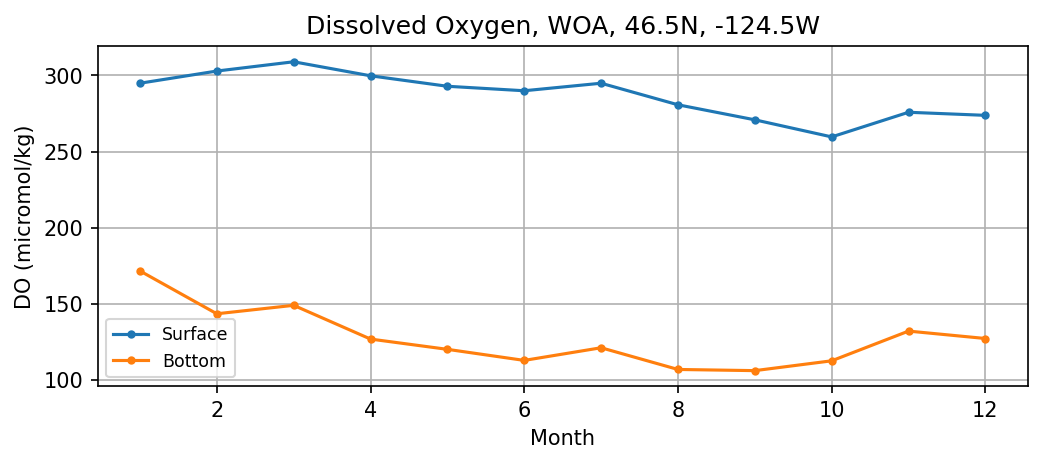

In [8]:
dt = pd.read_csv('./WOA_DOx_QIN.csv',index_col=0)

DOs=dt[(dt['lat']==46.5)&(dt['lon']==-124.5)]['Surface']
DOb=dt[(dt['lat']==46.5)&(dt['lon']==-124.5)]['Bottom']
mon=dt[(dt['lat']==46.5)&(dt['lon']==-124.5)]['Month']
depth = int(np.round(np.mean(dt[(dt['lat']==46.5)&(dt['lon']==-124.5)]['B_Depth'].values),0))

fig=plt.figure(figsize=(8,3),dpi=150)
plt.plot(mon,DOs, '.-',label='Surface')
plt.plot(mon,DOb, '.-',label='Bottom')
plt.grid()
plt.legend(loc=0, fontsize='small')
plt.ylabel('DO (micromol/kg)')
plt.xlabel('Month')
plt.title('Dissolved Oxygen, WOA, 46.5N, -124.5W')
plt.show()

In [9]:
d = {'Month':mon.values,'DO_46.5N,124.5W_Surface':DOs.values, 'DO_46.5N,124.5W_Bottom_'+str(depth)+'m':DOb.values}
dfall = pd.DataFrame(data=d)
dfall = dfall.reindex()
dfall

,Month,"DO_46.5N,124.5W_Surface","DO_46.5N,124.5W_Bottom_125m"
0,1,294.902,171.672
1,2,302.901,143.529
2,3,308.987,149.079
3,4,299.785,126.920
4,5,292.905,120.180
5,6,289.963,112.913
6,7,294.904,121.220
7,8,280.749,106.966
8,9,270.878,106.192
9,10,259.657,112.645


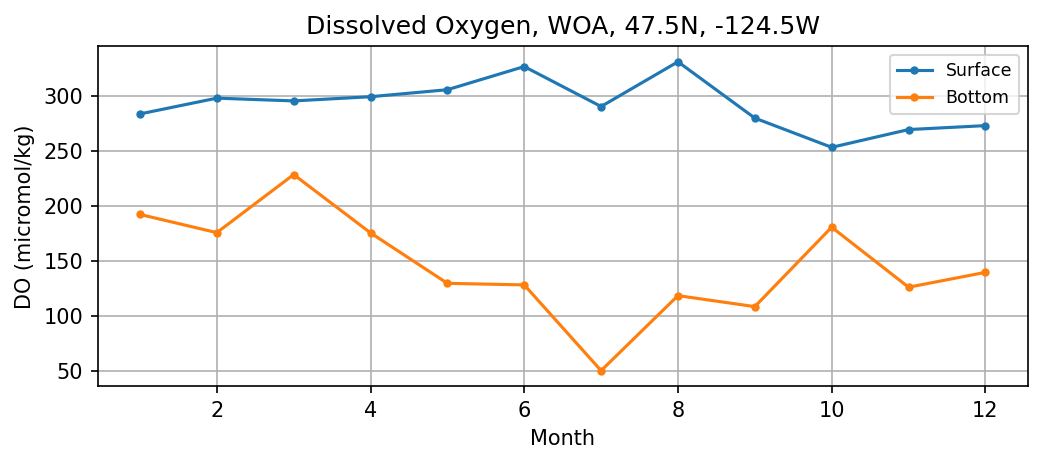

In [10]:
DOs=dt[(dt['lat']==47.5)&(dt['lon']==-124.5)]['Surface']
DOb=dt[(dt['lat']==47.5)&(dt['lon']==-124.5)]['Bottom']
mon=dt[(dt['lat']==47.5)&(dt['lon']==-124.5)]['Month']
depth = int(np.round(np.mean(dt[(dt['lat']==47.5)&(dt['lon']==-124.5)]['B_Depth'].values),0))

fig=plt.figure(figsize=(8,3),dpi=150)
plt.plot(mon,DOs, '.-',label='Surface')
plt.plot(mon,DOb, '.-',label='Bottom')
plt.grid()
plt.legend(loc=0, fontsize='small')
plt.ylabel('DO (micromol/kg)')
plt.xlabel('Month')
plt.title('Dissolved Oxygen, WOA, 47.5N, -124.5W')
plt.show()

In [11]:
dfall['DO_47.5N,124.5W_Surface']=DOs.values
dfall['DO_47.5N,124.5W_Bottom_'+str(depth)+'m']=DOb.values
dfall

,Month,"DO_46.5N,124.5W_Surface","DO_46.5N,124.5W_Bottom_125m","DO_47.5N,124.5W_Surface","DO_47.5N,124.5W_Bottom_100m"
0,1,294.902,171.672,283.495,192.293
1,2,302.901,143.529,297.818,175.767
2,3,308.987,149.079,295.311,228.466
3,4,299.785,126.920,299.108,175.555
4,5,292.905,120.180,305.469,129.776
5,6,289.963,112.913,326.488,128.345
6,7,294.904,121.220,290.231,50.541
7,8,280.749,106.966,330.821,118.619
8,9,270.878,106.192,279.719,108.631
9,10,259.657,112.645,253.185,180.706


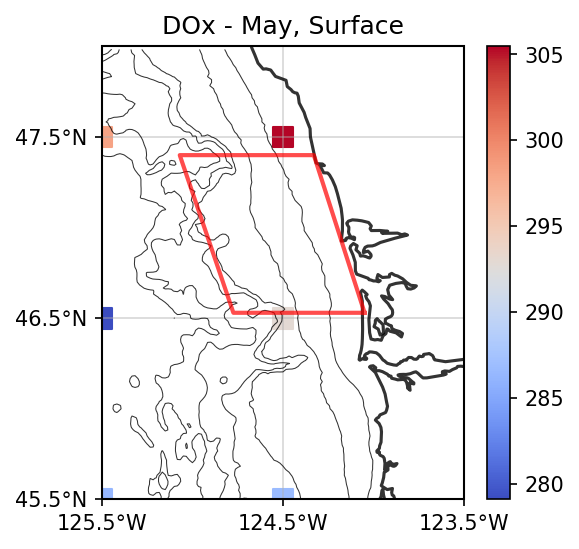

In [12]:
fig=plt.figure(figsize=(4,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
ax.set_xticks([*np.arange(ldom[1,0],ldom[1,1]+0.5,1)], crs=ccrs.PlateCarree())
ax.set_yticks([*np.arange(ldom[0,0],ldom[0,1]+0.5,1)], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
#ax.set_aspect(1.5)
a=dt['Month']==5
plt.contour(X,Y,topo2,[-1500,-1000,-500,-200,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
plt.scatter(dt[a].lon,dt[a].lat,100,c=dt['Surface'][a],marker='s', cmap='coolwarm')

#plt.contourf(msst.lon, msst.lat,msst, levels=[*np.arange(11,12.2,.1)],cmap='RdBu_r', zorder=2, alpha=0.9)
plt.plot(qbox[0,:],qbox[1,:],c='r',lw=2,zorder=5, alpha=0.7)
plt.title('DOx - '+mons[4]+', Surface')
plt.colorbar()
#plt.savefig('./AnnualSSTmean_1km_QIN.png')
plt.show()


In [13]:
dt = pd.read_csv('./WOA_Temp_QIN.csv',index_col=0)
np.unique(dt.lon)
dt.head()

,lat,lon,0,5,10,15,20,25,30,35,...,750,800,850,900,950,1000,Month,Surface,Bottom,B_Depth
0,45.625,-125.125,12.519,12.237,12.025,11.818,11.615,11.415,11.220,11.029,...,4.282,NaN,NaN,NaN,NaN,NaN,1,12.519,4.282,750.0
1,46.875,-125.375,10.092,10.099,10.103,10.100,10.098,10.092,10.105,10.138,...,4.129,4.010,3.872,3.752,3.616,NaN,1,10.092,3.616,950.0
2,46.875,-125.125,10.045,10.047,10.049,10.050,10.052,10.054,10.056,10.055,...,NaN,NaN,NaN,NaN,NaN,NaN,1,10.045,4.296,700.0
3,47.125,-125.125,9.340,9.353,9.358,9.377,9.416,9.444,9.421,9.416,...,4.217,4.045,3.897,3.753,3.661,NaN,1,9.340,3.661,950.0
4,47.125,-124.875,8.774,8.770,8.773,8.788,8.891,9.018,8.896,8.868,...,NaN,NaN,NaN,NaN,NaN,NaN,1,8.774,7.918,150.0


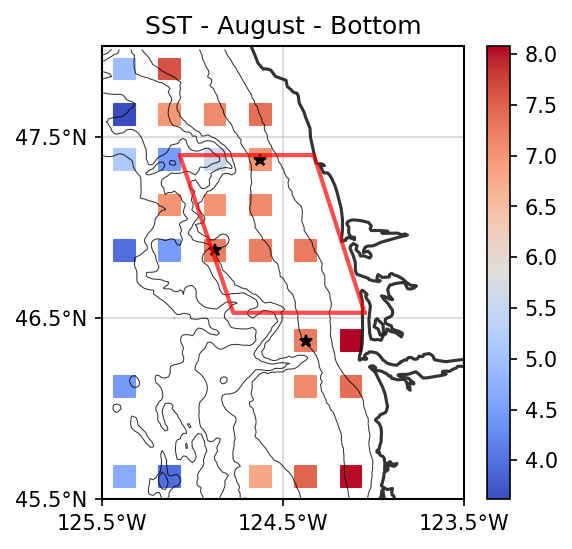

In [14]:
fig=plt.figure(figsize=(4,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
ax.set_xticks([*np.arange(ldom[1,0],ldom[1,1]+0.5,1)], crs=ccrs.PlateCarree())
ax.set_yticks([*np.arange(ldom[0,0],ldom[0,1]+0.5,1)], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
#ax.set_aspect(1.5)
a=dt['Month']==8
plt.contour(X,Y,topo2,[-1500,-1000,-500,-200,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
plt.scatter(dt[a].lon,dt[a].lat,100,c=dt[a]['Bottom'],marker='s', cmap='coolwarm')
plt.plot(-124.875,46.875,'k*')
plt.plot(-124.625,47.375,'k*')
plt.plot(-124.375,46.375,'k*')

#plt.contourf(msst.lon, msst.lat,msst, levels=[*np.arange(11,12.2,.1)],cmap='RdBu_r', zorder=2, alpha=0.9)
plt.plot(qbox[0,:],qbox[1,:],c='r',lw=2,zorder=5, alpha=0.7)
plt.title('SST - August - Bottom')
plt.colorbar()
#plt.savefig('./AnnualSSTmean_1km_QIN.png')
plt.show()


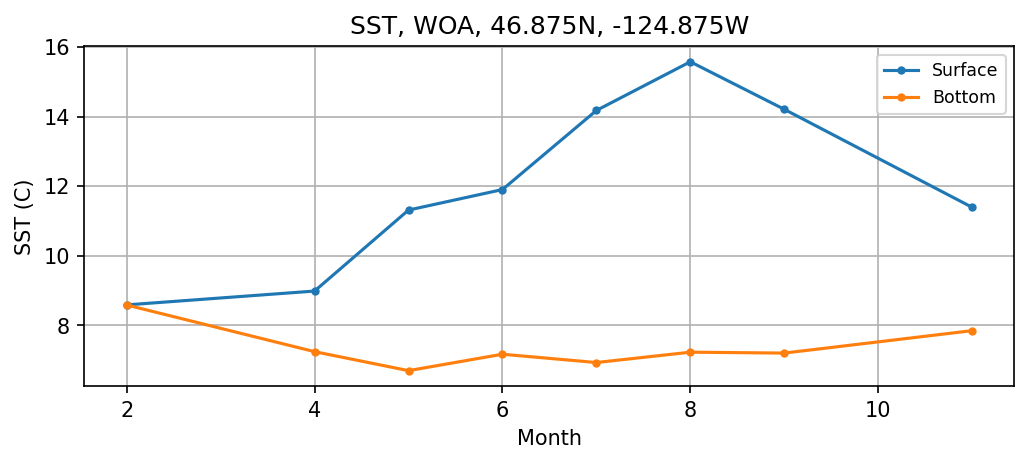

In [15]:
# SST
loni=-124.875
lati=46.875
SSTs=dt[(dt['lat']==lati)&(dt['lon']==loni)]['Surface']
SSTb=dt[(dt['lat']==lati)&(dt['lon']==loni)]['Bottom']
mon=dt[(dt['lat']==lati)&(dt['lon']==loni)]['Month']

fig=plt.figure(figsize=(8,3),dpi=150)
plt.plot(mon,SSTs, '.-',label='Surface')
plt.plot(mon,SSTb, '.-',label='Bottom')
plt.grid()
plt.legend(loc=0, fontsize='small')
plt.ylabel('SST (C)')
plt.xlabel('Month')
plt.title('SST, WOA, '+str(lati)+'N, '+str(loni)+'W')
plt.show()

In [16]:
# add climatology
# points
sel = np.array([[-124.875,-124.625,-124.375],[46.875,47.375,46.375]])
for i in range(3):
    s = list()
    b = list()
    d = list()
    for j in range(12):
        SSTs=dt[(dt['lat']==sel[1,i])&(dt['lon']==sel[0,i])&(dt['Month']==j+1)]['Surface']
        SSTb=dt[(dt['lat']==sel[1,i])&(dt['lon']==sel[0,i])&(dt['Month']==j+1)]['Bottom']
        depth = dt[(dt['lat']==sel[1,i])&(dt['lon']==sel[0,i])]['B_Depth']
            
        
        if len(SSTs)>0:
            s.append(SSTs.values.item(0))
        else:
            s.append(np.nan)
        if len(SSTb)>0:
            b.append(SSTb.values.item(0))
            d.append(depth.values.item(0))
        else:
            b.append(np.nan)
            d.append(np.nan)

    mdep = np.nanmean(d)
    
    nf1 = 'T_'+str(sel[1,i])+'N,'+str(sel[0,i]*-1)+'W_Surface'
    nf2 = 'T_'+str(sel[1,i])+'N,'+str(sel[0,i]*-1)+'W_Bottom_'+str(int(mdep))+'m'
    dfall[nf1]=s
    dfall[nf2]=b

dfall


,Month,"DO_46.5N,124.5W_Surface","DO_46.5N,124.5W_Bottom_125m","DO_47.5N,124.5W_Surface","DO_47.5N,124.5W_Bottom_100m","T_46.875N,124.875W_Surface","T_46.875N,124.875W_Bottom_150m","T_47.375N,124.625W_Surface","T_47.375N,124.625W_Bottom_100m","T_46.375N,124.375W_Surface","T_46.375N,124.375W_Bottom_70m"
0,1,294.902,171.672,283.495,192.293,NaN,NaN,NaN,NaN,NaN,NaN
1,2,302.901,143.529,297.818,175.767,8.588,8.585,NaN,NaN,NaN,NaN
2,3,308.987,149.079,295.311,228.466,NaN,NaN,NaN,NaN,NaN,NaN
3,4,299.785,126.920,299.108,175.555,8.986,7.243,NaN,NaN,NaN,NaN
4,5,292.905,120.180,305.469,129.776,11.315,6.697,10.769,7.244,NaN,NaN
5,6,289.963,112.913,326.488,128.345,11.905,7.169,NaN,NaN,NaN,NaN
6,7,294.904,121.220,290.231,50.541,14.180,6.930,11.849,6.713,NaN,NaN
7,8,280.749,106.966,330.821,118.619,15.580,7.228,12.570,6.996,14.693,7.253
8,9,270.878,106.192,279.719,108.631,14.213,7.202,10.913,7.198,13.819,7.502
9,10,259.657,112.645,253.185,180.706,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dt = pd.read_csv('./WOA_Sal_QIN.csv',index_col=0)
np.unique(dt.lat)

array([45.625, 45.875, 46.125, 46.375, 46.625, 46.875, 47.125, 47.375,
       47.625, 47.875])

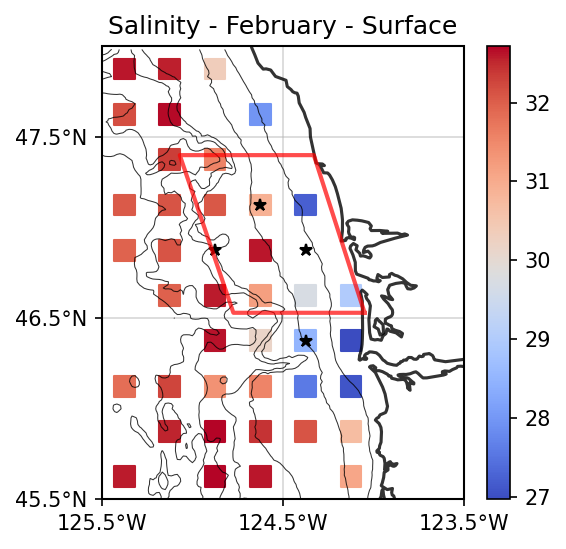

In [18]:
fig=plt.figure(figsize=(4,4),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
ax.set_xticks([*np.arange(ldom[1,0],ldom[1,1]+0.5,1)], crs=ccrs.PlateCarree())
ax.set_yticks([*np.arange(ldom[0,0],ldom[0,1]+0.5,1)], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
#ax.set_aspect(1.5)
a=dt['Month']==3
plt.contour(X,Y,topo2,[-1500,-1000,-500,-200,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.8)
plt.scatter(dt[a].lon,dt[a].lat,100,c=dt[a]['Surface'],marker='s', cmap='coolwarm')
plt.plot(-124.875,46.875,'k*')
plt.plot(-124.625,47.125,'k*')
plt.plot(-124.375,46.375,'k*')
plt.plot(-124.375,46.875,'k*')

#plt.contourf(msst.lon, msst.lat,msst, levels=[*np.arange(11,12.2,.1)],cmap='RdBu_r', zorder=2, alpha=0.9)
plt.plot(qbox[0,:],qbox[1,:],c='r',lw=2,zorder=5, alpha=0.7)
plt.title('Salinity - February - Surface')
plt.colorbar()
#plt.savefig('./AnnualSSTmean_1km_QIN.png')
plt.show()


In [19]:
# add climatology
# points
sel = np.array([[-124.875,-124.625,-124.375,-124.375],[46.875,47.125,46.375,46.875]])
         
for i in range(4):
    s = list()
    b = list()
    d = list()
    for j in range(12):
        SSTs=dt[(dt['lat']==sel[1,i])&(dt['lon']==sel[0,i])&(dt['Month']==j+1)]['Surface']
        SSTb=dt[(dt['lat']==sel[1,i])&(dt['lon']==sel[0,i])&(dt['Month']==j+1)]['Bottom']
        depth = dt[(dt['lat']==sel[1,i])&(dt['lon']==sel[0,i])]['B_Depth']
        
        if len(SSTs)>0:
            s.append(SSTs.values.item(0))
        else:
            s.append(np.nan)
        if len(SSTb)>0:
            b.append(SSTb.values.item(0))
            d.append(depth.values.item(0))
        else:
            b.append(np.nan)
            d.append(np.nan)

    mdep = np.nanmean(d)
    
    nf1 = 'S_'+str(sel[1,i])+'N,'+str(sel[0,i]*-1)+'W_Surface'
    nf2 = 'S_'+str(sel[1,i])+'N,'+str(sel[0,i]*-1)+'W_Bottom_'+str(int(mdep))+'m'
    dfall[nf1]=s
    dfall[nf2]=b

dfall


,Month,"DO_46.5N,124.5W_Surface","DO_46.5N,124.5W_Bottom_125m","DO_47.5N,124.5W_Surface","DO_47.5N,124.5W_Bottom_100m","T_46.875N,124.875W_Surface","T_46.875N,124.875W_Bottom_150m","T_47.375N,124.625W_Surface","T_47.375N,124.625W_Bottom_100m","T_46.375N,124.375W_Surface","T_46.375N,124.375W_Bottom_70m","S_46.875N,124.875W_Surface","S_46.875N,124.875W_Bottom_150m","S_47.125N,124.625W_Surface","S_47.125N,124.625W_Bottom_55m","S_46.375N,124.375W_Surface","S_46.375N,124.375W_Bottom_100m","S_46.875N,124.375W_Surface","S_46.875N,124.375W_Bottom_60m"
0,1,294.902,171.672,283.495,192.293,NaN,NaN,NaN,NaN,NaN,NaN,32.500,33.596,32.289,32.567,25.343,33.693,30.073,32.642
1,2,302.901,143.529,297.818,175.767,8.588,8.585,NaN,NaN,NaN,NaN,31.207,33.865,32.012,32.881,26.884,33.571,28.198,32.629
2,3,308.987,149.079,295.311,228.466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.899,33.671,28.495,33.640,NaN,30.595
3,4,299.785,126.920,299.108,175.555,8.986,7.243,NaN,NaN,NaN,NaN,32.218,33.313,29.077,31.785,29.207,33.967,24.589,32.129
4,5,292.905,120.180,305.469,129.776,11.315,6.697,10.769,7.244,NaN,NaN,31.033,33.865,30.129,33.720,28.954,34.031,30.803,33.595
5,6,289.963,112.913,326.488,128.345,11.905,7.169,NaN,NaN,NaN,NaN,31.090,33.929,32.160,33.941,26.328,33.982,31.598,33.244
6,7,294.904,121.220,290.231,50.541,14.180,6.930,11.849,6.713,NaN,NaN,30.777,33.901,31.876,33.875,30.287,33.860,31.682,33.838
7,8,280.749,106.966,330.821,118.619,15.580,7.228,12.570,6.996,14.693,7.253,31.668,33.894,32.067,33.880,30.891,33.981,32.525,33.874
8,9,270.878,106.192,279.719,108.631,14.213,7.202,10.913,7.198,13.819,7.502,31.829,33.857,30.963,33.734,29.606,33.935,31.253,33.765
9,10,259.657,112.645,253.185,180.706,NaN,NaN,NaN,NaN,NaN,NaN,31.969,33.870,31.820,33.669,30.006,33.861,30.699,33.780


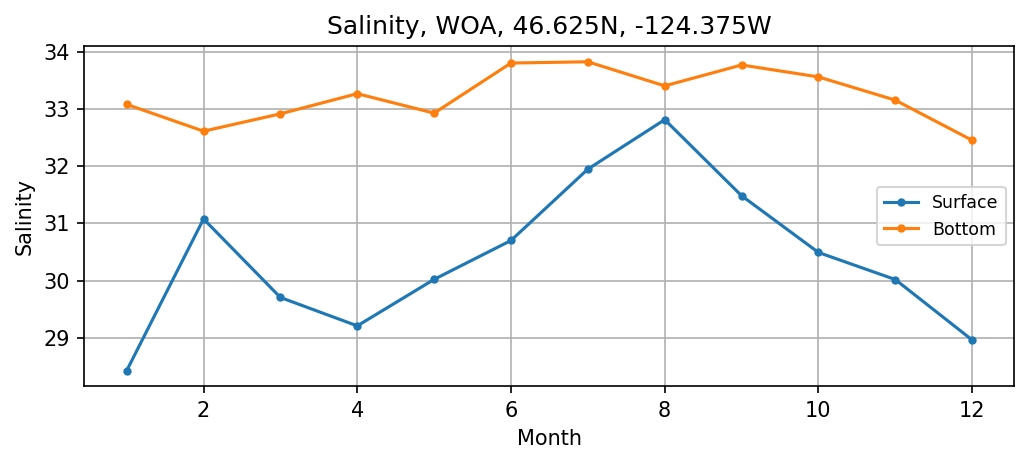

In [20]:
# Salinity
loni=-124.375
lati=46.625
SSTs=dt[(dt['lat']==lati)&(dt['lon']==loni)]['Surface']
SSTb=dt[(dt['lat']==lati)&(dt['lon']==loni)]['Bottom']
mon=dt[(dt['lat']==lati)&(dt['lon']==loni)]['Month']

fig=plt.figure(figsize=(8,3),dpi=150)
plt.plot(mon,SSTs, '.-',label='Surface')
plt.plot(mon,SSTb, '.-',label='Bottom')
plt.grid()
plt.legend(loc=0, fontsize='small')
plt.ylabel('Salinity')
plt.xlabel('Month')
plt.title('Salinity, WOA, '+str(lati)+'N, '+str(loni)+'W')
plt.show()

In [21]:
dfall.to_csv('./QIN_WOA_T-DO-S_climatology.csv')